# ✨ Projeto Sprint 4

</br>

<font size="5"><i>Análise De Qual Plano Pré-Pago Dá Mais Receita Para Empresa</i></font>

<font size="4"><b>Descrição do Projeto:</b></font>

A empresa de telecomunicações Megaline oferece aos seus cliente planos pré-pagos, Surf e Ultimate e departamento comercial quer saber quais dos planos dão mais receita para ajustar o orçamento de publicidade.

Para auxiliar a análise será utilizado um dataset com os dados de 500 clientes da Megaline: que clientes são, de onde eles são, qual plano usam, o número de chamadas que eles fizeram e mensagens que eles enviaram em 2018. Onde iremos analisar o comportamento dos clientes e determinar quais planos pré-pagos dão mais receita.

<font size="4"><b>Detalhes sobre os Planos da Megaline:</b></font>


<font size="3"><b>Surf</b></font>
1. <p>Preço mensal: 20,00</p></br>
2. <p>500 minutos mensais, 50 mensagens de texto, e 15 GB de dados</p></br>
3. <p>Depois de exceder os limites do pacote:</p>
- 1 minuto: 3 centavos
- 1 mensagem de texto: 3 centavos
- 1 GB de dados: 10,00

</br>

<font size="3"><b>Ultimate</b></font>
1. <p>Preço mensal: 70,00</p></br>
2. <p>3000 minutos mensais, 1000 mensagens de texto, e 30 GB de dados</p></br>
3. <p>Depois de exceder os limites do pacote:</p>
- 1 minuto: 1 centavo
- 1 mensagem de texto: 1 centavo
- 1 GB de dados: 7,00

<font size="2"><b>Desenvolvido por: Yasmin Zanon Barg.</b></font>

---

# Conteúdo <a id='back'></a>

* [Etapa 1. Visão Geral dos Dados](#data_review)
* [Etapa 2. Pré-Processamento de Dados](#data_preprocessing)
    * [2.1 Substituindo Os Valores Ausentes](#missing_values)
    * [2.2 Convertendo os Tipos de Dados](#coverting)
    * [2.3 Ajustando Valores Zerados](#zero_values)
* [Etapa 3. Análise Exploratória dos Dados](#categorizando_dados)
    * [3.1 Categorizando Dados](#conclusion_data_preprocessing)
    * [3.2 EDA](#dados_estado_civil)
* [Etapa 4. Testar hipóteses](#hypotheses)


---

## Etapa. Visão Geral do Dados <a id='data_review'></a>

Essa fase tem o propósito de explorar os dados entregues e nos familiarizar com eles para podermos seguir com as próximas etapas das análises.

In [1]:
# Primeiramente é necessário importar as bibliotecas necessárias
import pandas as pd 
import matplotlib.pyplot as plt # Será utilizada para montarmos nossos gráficos
import numpy as np # Biblioteca de funções matemáticas de alto nível
from math import factorial # Usado para calcular o Fatorial
from scipy import stats as st # Auxilia nos calculos de probabilidades



# Carregando os dados
users = pd.read_csv('/datasets/megaline_users.csv')
calls = pd.read_csv('/datasets/megaline_calls.csv')
messages = pd.read_csv('/datasets/megaline_messages.csv')
internet = pd.read_csv('/datasets/megaline_internet.csv')
plans = pd.read_csv('/datasets/megaline_plans.csv')

<font size="4"><b>Campos dos Dataframes:</b></font>

<b>A tabela users (dados sobre usuários):</b>
- `user_id` = identificação do usuário
- `first_name` = nome do usuário
- `last_name` = último sobrenome do usuário
- `age` = idade do usuário (em anos)
- `reg_date` = data da inscrição (dd, mm, aa)
- `churn_date` = a data que o usuário parou de usar o serviço (se o valor for ausente, o plano estava sendo usado quando esse dado foi gerado)
- `city` = cidade de residência do usuário
- `plan` = nome do plano

<br>

<b>A tabela calls (dados sobre as chamadas):</b>
- `id` = identificador de chamada unívoco
- `call_date` = data da chamada
- `duration` = duração da chamada (em minutos)
- `user_id` = o identificador do usuário que faz a chamada

<br>

<b>A tabela messages (dados nas mensagens de texto):</b>
- `id` = identificador unívoco de mensagem de textos
- `message_date` = data da mensagem de texto
- `user_id` = o identificador do usuário que envia a mensagem de texto

<br>

<b>A tabela internet (dados sobre sessões web):</b>
- `id` = identificador de sessão unívoco
- `mb_used` = o volume de dados gasto durante a sessão ( em megabytes)
- `session_date` = data da sessão web
- `user_id` = identificador do usuário

<br>

<b>A tabela plans(dados sobre os planos):</b>
- `plan_name` = o nome do plano de chamadas
- `usd_monthly_fee` = preço mensal em dólares dos EUA
- `minutes_included` = pacote de minutos mensal
- `messages_included` = pacote de mensagens de texto mensal
- `mb_per_month_included` = pacote de volume de dados (em megabytes)
- `usd_per_minute` = preço por minuto depois de exceder o limite do pacote (por exemplo, se o pacote inclui 100 minutos, o primeiro minuto excedente será cobrado)
- `usd_per_message` = preço por mensagem de texto depois de exceder o limite do pacote
- `usd_per_gb` = preço por gigabyte extra de dados após exceder o limite do pacote (1 GB = 1024 megabytes)


<font size="4"><b>Utilizando o pandas pra conhecer mais os nossos dataframes:</b></font>

Agora que já carregamos os dados para os dataframes utilizaremos as funções: `info()`, `head()` e `describe()` para explorar e nos familiarizar ainda mais com as informações.

Para automatizarmos o processo para os 5 dataframes, iremos colocá-los dentro de um array, onde iremos percorrer ele dentro de um for.

In [2]:
datasets = [users, calls, messages, internet, plans]

repeticao = 0

for elem in datasets:
    if repeticao == 0:
        print('Informações gerais do dataset users:')
    if repeticao == 1:
        print('Informações gerais do dataset calls:')
    if repeticao == 2:
        print('Informações gerais do dataset messages:')
    if repeticao == 3:
        print('Informações gerais do dataset internet:')
    if repeticao == 4:
        print('Informações gerais do dataset plans:')
    print('\n')
    print(elem.info())
    print('\n')
    print(elem.head(15))
    print('\n')
    print(elem.describe())
    print('\n')
    print(elem.isna().sum())
    print('\n')
    print('----------------------------------------------------')
    print('\n')
    repeticao += 1

Informações gerais do dataset users:


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
None


    user_id first_name  last_name  age  \
0      1000   Anamaria      Bauer   45   
1      1001     Mickey  Wilkerson   28   
2      1002     Carlee    Hoffman   36   
3      1003   Reynaldo    Jenkins   52   
4      1004    Leonila   Thompson   40   
5      1005      Livia    Shields   31   
6      1006     Jesusa   Bradford   73   
7      1007    Eusebio      Welch   42   
8      1008      Emel

<font size="4"><b>Conclusão:</b></font>

Nessa primeira etapa foi possível nos familiarizar com os dados dos dataframes que foram disponibilizados para nós nessa analise e com o auxilio de algumas funções do pandas, como describe() e info() já conseguimos identificar algumas inconsistencias de tipo de dados e valores zerados que serão tratados no próximo passo de pré-processamento de dados. 


---

## Etapa. Pré-Processamento de Dados <a id='data_preprocessing'></a>

Ao realizar a exploração de dados nos dataframes a cima, foi possível identificar os seguintes problemas que precisam ser tratados:


**1º)** Nossos dataframes não possui `valores ausentes`, exceto pelo campo <i>"churn_date"</i> da tabela "users", onde esses valores indicam que o plano ainda está em vigor. Para melhor entendimento, será alterado os valores desses campos para "operative".

**2º)** Será necessário converter todos os `tipos de dados` dos campos referente a datas de "object"(strings) para "timestamp"(data).

**3º)** É preciso validar também os `valores zerados`do campo <i>"duration"</i> da tabela "calls".

OBS: Não iremos modificar os valores zerados do campo <i>"mb_used"</i> da tabela "internet", pois pode ser de fato que o usuario não usou a internert naquele determinado mês.

### Substituindo Os Valores Ausentes <a id='missing_values'></a>

In [3]:
# Substituindo os valores NaN da coluna 'churn_date'
users['churn_date'] = users['churn_date'].fillna("operative")

In [4]:
# Validando o nosso ajuste
users['churn_date'].value_counts()

operative     466
2018-12-18      3
2018-12-31      2
2018-12-19      2
2018-11-14      2
2018-11-16      1
2018-12-15      1
2018-09-18      1
2018-12-10      1
2018-10-22      1
2018-11-29      1
2018-08-19      1
2018-11-24      1
2018-12-22      1
2018-12-27      1
2018-10-03      1
2018-12-12      1
2018-09-01      1
2018-12-30      1
2018-09-17      1
2018-08-16      1
2018-07-31      1
2018-11-11      1
2018-11-21      1
2018-11-30      1
2018-09-07      1
2018-12-26      1
2018-11-18      1
2018-10-13      1
2018-10-07      1
Name: churn_date, dtype: int64

### Convertendo os Tipos de Dados <a id='coverting'></a>

In [5]:
# Corvertendo o valor 'date_posted' para datetime64:
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')

In [6]:
#Validando o ajuste

df = [users, calls, messages, internet]

for elem in df:
    print(elem.dtypes)

user_id                int64
first_name            object
last_name             object
age                    int64
city                  object
reg_date      datetime64[ns]
plan                  object
churn_date            object
dtype: object
id                   object
user_id               int64
call_date    datetime64[ns]
duration            float64
dtype: object
id                      object
user_id                  int64
message_date    datetime64[ns]
dtype: object
id                      object
user_id                  int64
session_date    datetime64[ns]
mb_used                float64
dtype: object


### Ajustando Valores Zerados <a id='zero_values'></a>

<br>

**- Campo "duration" da tabela "calls":**

In [7]:
#  Validando a quantidade de valores iguais a 0
calls.loc[calls['duration'] == 0].count()

id           26834
user_id      26834
call_date    26834
duration     26834
dtype: int64

In [8]:
# Filtrando o dataframe call, para mostrar só os valores zerados
zero_calls_duration = calls.loc[calls['duration'] == 0]
zero_calls_duration

,id,user_id,call_date,duration
19,1001_4,1001,2018-12-05,0.0
25,1001_13,1001,2018-12-24,0.0
31,1001_30,1001,2018-10-17,0.0
32,1001_31,1001,2018-11-03,0.0
34,1001_35,1001,2018-12-21,0.0
...,...,...,...,...
137714,1499_183,1499,2018-11-10,0.0
137715,1499_184,1499,2018-09-15,0.0
137720,1499_189,1499,2018-12-27,0.0
137722,1499_191,1499,2018-12-24,0.0


In [9]:
# Calculando a porcentagem do nosso dataframe que está comprometido com valores zerados

percentage_zero_duration_call = (len(zero_calls_duration.index) / len(calls.index))*100
percentage_zero_duration_call

19.482339274694162

Uma possibilidade é que essas chamadas de 0,0 minutos podem ser de ligações perdidas, porém 19% do nosso dataframe é uma parte muito importante para apenas deletarmos, então como não temos nenhum valor atípico em nosso conjunto de dados, irei utilizar a média dessa coluna para subtituir os valores igual a zero.

In [10]:
mean = calls['duration'].mean()

calls['duration'] = calls['duration'].replace(0, mean)


In [11]:
# Validando o ajuste
calls.loc[calls['duration'] == 0]

,id,user_id,call_date,duration


---

## Etapa. Análise Exploratória dos Dados <a id='EDA'></a>

Agora que já coletamos e pré-processamos os nossos dados iremos começar a extrair informações e conhecer os comportamentos dos clientes. 

### Categorizando Dados <a id='categorizing_data'></a>

Para facilitar nossa analise iremos juntar algumas informações necessárias em uma tabela única.

In [12]:
# O número de chamadas feitas e minutos por mês para cada usuário

calls['month'] = pd.DatetimeIndex(calls['call_date']).month

calls_pivot = calls.pivot_table(index = ['user_id', 'month'], values = 'duration', aggfunc = ['sum','count'])
calls_pivot.columns = ['minutes_used', 'calls_made']
calls_pivot = calls_pivot.reset_index()
calls_pivot['minutes_used'] = calls_pivot['minutes_used'].apply(np.ceil) 
calls_pivot.head()

,user_id,month,minutes_used,calls_made
0,1000,12,117.0,16
1,1001,8,205.0,27
2,1001,9,372.0,49
3,1001,10,496.0,65
4,1001,11,506.0,64


In [13]:
# O número de mensagens de texto enviadas por mês.

messages['month'] = pd.DatetimeIndex(messages['message_date']).month

messages_pivot = messages.groupby(['user_id', 'month']).count()
messages_pivot = messages_pivot.drop(columns=['id'])
messages_pivot.columns = ['messages_send']
messages_pivot = messages_pivot.reset_index()
messages_pivot.head()


,user_id,month,messages_send
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36


In [14]:
# Realizando a comvesão de mg para gb e logo em seguida realizando o arredondamento
# Lembrando que 1 GB = 1024 MB

internet['mb_used'] = internet['mb_used'] / 1024
internet['mb_used'] = internet['mb_used'].apply(np.ceil) 

internet.head(10)

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,1.0
1,1000_204,1000,2018-12-31,0.0
2,1000_379,1000,2018-12-28,1.0
3,1000_413,1000,2018-12-26,1.0
4,1000_442,1000,2018-12-27,1.0
5,1001_0,1001,2018-08-24,1.0
6,1001_3,1001,2018-12-09,1.0
7,1001_4,1001,2018-11-04,1.0
8,1001_10,1001,2018-11-27,1.0
9,1001_15,1001,2018-12-13,1.0


In [15]:
# O volume de dados por mês

internet['month'] = pd.DatetimeIndex(internet['session_date']).month

internet_pivot = internet.pivot_table(index = ['user_id', 'month'], values = 'mb_used', aggfunc = 'sum')
internet_pivot.columns = ['total_gb_used']
internet_pivot = internet_pivot.reset_index() 
internet_pivot.head()


,user_id,month,total_gb_used
0,1000,12,4.0
1,1001,8,21.0
2,1001,9,41.0
3,1001,10,50.0
4,1001,11,49.0


In [16]:
# Coletando todos os id dos usuários
users_plan = users[['user_id', 'plan']]
users_plan

,user_id,plan
0,1000,ultimate
1,1001,surf
2,1002,surf
3,1003,surf
4,1004,surf
...,...,...
495,1495,surf
496,1496,surf
497,1497,ultimate
498,1498,surf


In [17]:
# Adicionando a tabela de região para analise de hipoteses posteriormente
users_region = users[['user_id', 'city']]
users_region

,user_id,city
0,1000,"Atlanta-Sandy Springs-Roswell, GA MSA"
1,1001,"Seattle-Tacoma-Bellevue, WA MSA"
2,1002,"Las Vegas-Henderson-Paradise, NV MSA"
3,1003,"Tulsa, OK MSA"
4,1004,"Seattle-Tacoma-Bellevue, WA MSA"
...,...,...
495,1495,"New York-Newark-Jersey City, NY-NJ-PA MSA"
496,1496,"New Orleans-Metairie, LA MSA"
497,1497,"Los Angeles-Long Beach-Anaheim, CA MSA"
498,1498,"New York-Newark-Jersey City, NY-NJ-PA MSA"


In [18]:
#Juntando as tabelas a cima

user_total_data = pd.merge(calls_pivot, messages_pivot,  how = 'outer', on = ['user_id','month'])
user_total_data = pd.merge(user_total_data, internet_pivot,  how = 'outer', on = ['user_id','month'])
user_total_data = pd.merge(user_total_data, users_plan,  how = 'outer', on = 'user_id')
user_total_data = pd.merge(user_total_data, users_region,  how = 'outer', on = 'user_id')

user_total_data.tail(50)

,user_id,month,minutes_used,calls_made,messages_send,total_gb_used,plan,city
2253,1498,7.0,325.0,43.0,NaN,61.0,surf,"New York-Newark-Jersey City, NY-NJ-PA MSA"
2254,1498,8.0,292.0,44.0,NaN,54.0,surf,"New York-Newark-Jersey City, NY-NJ-PA MSA"
2255,1498,9.0,386.0,45.0,NaN,52.0,surf,"New York-Newark-Jersey City, NY-NJ-PA MSA"
2256,1498,10.0,339.0,46.0,NaN,53.0,surf,"New York-Newark-Jersey City, NY-NJ-PA MSA"
2257,1498,11.0,290.0,41.0,NaN,47.0,surf,"New York-Newark-Jersey City, NY-NJ-PA MSA"
2258,1498,12.0,372.0,39.0,NaN,56.0,surf,"New York-Newark-Jersey City, NY-NJ-PA MSA"
2259,1499,9.0,371.0,41.0,NaN,37.0,surf,"Orlando-Kissimmee-Sanford, FL MSA"
2260,1499,10.0,445.0,53.0,NaN,52.0,surf,"Orlando-Kissimmee-Sanford, FL MSA"
2261,1499,11.0,330.0,45.0,NaN,43.0,surf,"Orlando-Kissimmee-Sanford, FL MSA"
2262,1499,12.0,529.0,65.0,NaN,58.0,surf,"Orlando-Kissimmee-Sanford, FL MSA"


In [19]:
# Calculando a receita mensal de cada usuário e adicionando uma nova coluna na tabela com esse valor

for i in range(len(user_total_data)):
    
    additional_price = 0
    
    if user_total_data.loc[i, "plan"] == "surf":
        # Mensagens enviadas:
        if user_total_data.loc[i,"messages_send"] > 50:
            additional_price += (user_total_data.loc[i,"messages_send"] - 50) * 0.03
        # Dados utilizados:
        if user_total_data.loc[i,"total_gb_used"] > 15:
            additional_price += (user_total_data.loc[i,"total_gb_used"] - 15) * 10
        # Minutos de chamadas:
        if user_total_data.loc[i,"minutes_used"] > 500:
            additional_price += (user_total_data.loc[i,"minutes_used"] - 500) * 0.3   
        user_total_data.loc[i, "revenue"] = 20 + additional_price
        
    if user_total_data.loc[i,"plan"] == "ultimate":
        # Mensagens enviadas:
        if user_total_data.loc[i,"messages_send"] > 1000:
            additional_price += (user_total_data.loc[i,"messages_send"] - 1000) * 0.01
        #Dados utilizados:
        if user_total_data.loc[i,"total_gb_used"] > 30:
            additional_price += (user_total_data.loc[i,"total_gb_used"] - 30) * 7
        # Minutos de chamadas:
        if user_total_data.loc[i,"minutes_used"] > 3000:
            additional_price += (user_total_data.loc[i,"minutes_used"] - 3000) * 0.1 
        user_total_data.loc[i, "revenue"] = 70 + additional_price
        
user_total_data.head(15)

,user_id,month,minutes_used,calls_made,messages_send,total_gb_used,plan,city,revenue
0,1000,12.0,117.0,16.0,11.0,4.0,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA",70.00
1,1001,8.0,205.0,27.0,30.0,21.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",80.00
2,1001,9.0,372.0,49.0,44.0,41.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",280.00
3,1001,10.0,496.0,65.0,53.0,50.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",370.09
4,1001,11.0,506.0,64.0,36.0,49.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",361.80
5,1001,12.0,461.0,56.0,44.0,55.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",420.00
6,1002,10.0,75.0,11.0,15.0,15.0,surf,"Las Vegas-Henderson-Paradise, NV MSA",20.00
7,1002,11.0,407.0,55.0,32.0,45.0,surf,"Las Vegas-Henderson-Paradise, NV MSA",320.00
8,1002,12.0,424.0,47.0,41.0,37.0,surf,"Las Vegas-Henderson-Paradise, NV MSA",240.00
9,1003,12.0,1251.0,149.0,50.0,53.0,surf,"Tulsa, OK MSA",625.30


In [20]:
user_total_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2303 entries, 0 to 2302
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        2303 non-null   int64  
 1   month          2293 non-null   float64
 2   minutes_used   2258 non-null   float64
 3   calls_made     2258 non-null   float64
 4   messages_send  1806 non-null   float64
 5   total_gb_used  2277 non-null   float64
 6   plan           2303 non-null   object 
 7   city           2303 non-null   object 
 8   revenue        2303 non-null   float64
dtypes: float64(6), int64(1), object(2)
memory usage: 244.5+ KB


### EDA <a id='categorizing_data'></a>

Nessa etapa vamos usar os dados que juntamos anteriormente e analisaremos o comportamento dos clientes, atráves de cálculos e dos histogramas.

In [21]:
#Visão geral dos dados do plano Surf
user_total_data[user_total_data['plan'] == "surf"][['messages_send','total_gb_used','minutes_used']].describe()

,messages_send,total_gb_used,minutes_used
count,1222.000000,1558.000000,1545.000000
mean,40.109656,40.526958,492.095793
std,33.035500,17.485040,256.223459
min,1.000000,1.000000,2.000000
25%,16.000000,31.000000,321.000000
50%,32.000000,42.000000,489.000000
75%,54.000000,52.000000,652.000000
max,266.000000,132.000000,1688.000000


In [22]:
#Visão geral dos dados do plano Ultimate
user_total_data[user_total_data['plan'] == "ultimate"][['messages_send','total_gb_used','minutes_used']].describe()

,messages_send,total_gb_used,minutes_used
count,584.000000,719.000000,713.000000
mean,46.296233,41.137691,492.301543
std,32.942118,16.468902,267.173922
min,1.000000,1.000000,10.000000
25%,21.000000,32.000000,300.000000
50%,41.000000,42.000000,491.000000
75%,66.000000,51.000000,635.000000
max,166.000000,96.000000,1529.000000


In [23]:
# Medidas de Localização (Média e Mediana) + Variância + Desvio padrão

# Calculando e declarando variáveis
messages_send_mean_surf = user_total_data[user_total_data['plan'] == "surf"]['messages_send'].mean()
messages_send_median_surf = user_total_data[user_total_data['plan'] == "surf"]['messages_send'].median()
messages_send_var_surf = np.var(user_total_data[user_total_data['plan'] == "surf"]['messages_send'])
messages_send_des_surf = np.std(user_total_data[user_total_data['plan'] == "surf"]['messages_send'])
messages_send_mean_ultimate = user_total_data[user_total_data['plan'] == "ultimate"]['messages_send'].mean()
messages_send_median_ultimate = user_total_data[user_total_data['plan'] == "ultimate"]['messages_send'].median()
messages_send_var_ultimate = np.var(user_total_data[user_total_data['plan'] == "ultimate"]['messages_send'])
messages_send_des_ultimate = np.std(user_total_data[user_total_data['plan'] == "ultimate"]['messages_send'])


total_gb_used_mean_surf = user_total_data[user_total_data['plan'] == "surf"]['total_gb_used'].mean()
total_gb_used_median_surf = user_total_data[user_total_data['plan'] == "surf"]['total_gb_used'].median()
total_gb_used_var_surf = np.var(user_total_data[user_total_data['plan'] == "surf"]['total_gb_used'])
total_gb_used_des_surf = np.std(user_total_data[user_total_data['plan'] == "surf"]['total_gb_used'])
total_gb_used_mean_ultimate = user_total_data[user_total_data['plan'] == "ultimate"]['total_gb_used'].mean()
total_gb_used_median_ultimate = user_total_data[user_total_data['plan'] == "ultimate"]['total_gb_used'].median()
total_gb_used_var_ultimate = np.var(user_total_data[user_total_data['plan'] == "ultimate"]['total_gb_used'])
total_gb_used_des_ultimate = np.std(user_total_data[user_total_data['plan'] == "ultimate"]['total_gb_used'])


minutes_used_mean_surf = user_total_data[user_total_data['plan'] == "surf"]['minutes_used'].mean()
minutes_used_median_surf = user_total_data[user_total_data['plan'] == "surf"]['minutes_used'].median()
minutes_used_var_surf = np.var(user_total_data[user_total_data['plan'] == "surf"]['minutes_used'])
minutes_used_des_surf = np.std(user_total_data[user_total_data['plan'] == "surf"]['minutes_used'])
minutes_used_mean_ultimate = user_total_data[user_total_data['plan'] == "ultimate"]['minutes_used'].mean()
minutes_used_median_ultimate = user_total_data[user_total_data['plan'] == "ultimate"]['minutes_used'].median()
minutes_used_var_ultimate = np.var(user_total_data[user_total_data['plan'] == "ultimate"]['minutes_used'])
minutes_used_des_ultimate = np.std(user_total_data[user_total_data['plan'] == "ultimate"]['minutes_used'])


# Mostrando na tela os valores
print(f'-----------Mensagens enviadas-----------' ,'\n',
      'SURF:', '\n',
      '    Média = ' , messages_send_mean_surf , '\n',
      '    Mediana = ' , messages_send_median_surf , '\n' ,
      '    Variância = ' , messages_send_var_surf , '\n' ,
      '    Desvio Padrão = ' , messages_send_des_surf, '\n\n',
      'ULTIMATE:', '\n',
      '    Média = ' , messages_send_mean_ultimate , '\n' ,
      '    Mediana = ' , messages_send_median_ultimate , '\n',
      '    Variância = ' , messages_send_var_ultimate , '\n',
      '    Desvio Padrão = ' , messages_send_des_ultimate, '\n\n\n' ,
      
     '-------------Dados utilizados-------------' ,'\n',
      'SURF:', '\n'
      '     Média = ' , total_gb_used_mean_surf , '\n',
      '    Mediana = ' , total_gb_used_median_surf , '\n' ,
      '    Variância = ' , total_gb_used_var_surf , '\n' ,
      '    Desvio Padrão = ' , total_gb_used_des_surf, '\n\n',
      'ULTIMATE:', '\n',
      '    Média = '  , total_gb_used_mean_ultimate , '\n' ,
      '    Mediana = ' , total_gb_used_median_ultimate , '\n' ,
      '    Variância = ' , total_gb_used_var_ultimate , '\n' ,
      '    Desvio Padrão = ' , total_gb_used_des_ultimate, '\n\n\n' ,
      
     '------------Minutos de chamadas------------' ,'\n',
      'SURF:', '\n'
      '     Média = ' , minutes_used_mean_surf , '\n' ,
      '    Mediana = ' , minutes_used_median_surf , '\n' ,
      '    Variância = ' , minutes_used_var_surf , '\n' ,
      '    Desvio Padrão = ' , minutes_used_des_surf, '\n\n' ,
      'ULTIMATE:', '\n',
      '    Média = ' , minutes_used_mean_ultimate ,'\n' ,
      '    Mediana = ' , minutes_used_median_ultimate , '\n'
      '     Variância = ' , minutes_used_var_ultimate, '\n' 
      '     Desvio Padrão = ' , minutes_used_des_ultimate 
     )


-----------Mensagens enviadas----------- 
 SURF: 
     Média =  40.10965630114566 
     Mediana =  32.0 
     Variância =  1090.4511506183685 
     Desvio Padrão =  33.02197981070137 

 ULTIMATE: 
     Média =  46.29623287671233 
     Mediana =  41.0 
     Variância =  1083.3249173156314 
     Desvio Padrão =  32.91390158148425 


 -------------Dados utilizados------------- 
 SURF: 
     Média =  40.526957637997434 
     Mediana =  42.0 
     Variância =  305.5304029391554 
     Desvio Padrão =  17.479427992333026 

 ULTIMATE: 
     Média =  41.13769123783032 
     Mediana =  42.0 
     Variância =  270.8475223469469 
     Desvio Padrão =  16.457445802643463 


 ------------Minutos de chamadas------------ 
 SURF: 
     Média =  492.0957928802589 
     Mediana =  489.0 
     Variância =  65607.9688172516 
     Desvio Padrão =  256.1405255270075 

 ULTIMATE: 
     Média =  492.3015427769986 
     Mediana =  491.0 
     Variância =  71281.78985736739 
     Desvio Padrão =  266.98649751882

In [24]:
# Regra dos três sigmas

min_value_messages_send_surf = messages_send_mean_surf - 3 * messages_send_median_surf
max_value_messages_send_surf = messages_send_mean_surf + 3 * messages_send_median_surf
min_value_messages_send_ultimate = messages_send_mean_ultimate - 3 * messages_send_median_ultimate
max_value_messages_send_ultimate = messages_send_mean_ultimate + 3 * messages_send_median_ultimate

min_value_total_gb_used_surf = total_gb_used_mean_surf - 3 * total_gb_used_median_surf
max_value_total_gb_used_surf = total_gb_used_mean_surf + 3 * total_gb_used_median_surf
min_value_total_gb_used_ultimate = total_gb_used_mean_ultimate - 3 * total_gb_used_median_ultimate
max_value_total_gb_used_ultimate = total_gb_used_mean_ultimate + 3 * total_gb_used_median_ultimate


min_value_minutes_used_surf = minutes_used_mean_surf - 3 * minutes_used_median_surf
max_value_minutes_used_surf = minutes_used_mean_surf + 3 * minutes_used_median_surf
min_value_minutes_used_ultimate = minutes_used_mean_ultimate - 3 * minutes_used_median_ultimate
max_value_minutes_used_ultimate = minutes_used_mean_ultimate + 3 * minutes_used_median_ultimate




print(f'----------------------Mensagens enviadas----------------------' ,'\n',
      'SURF:', '\n',
      '    Intervalo:', min_value_messages_send_surf, 'até', max_value_messages_send_surf , '\n\n',
      'ULTIMATE:', '\n',
      '    Intervalo:', min_value_messages_send_ultimate, 'até', max_value_messages_send_ultimate, '\n\n\n' ,
      
     '----------------------Dados utilizados----------------------' ,'\n',
      'SURF:', '\n'
      '     Intervalo:', min_value_total_gb_used_surf, 'até', max_value_total_gb_used_surf, '\n\n',
      'ULTIMATE:', '\n',
      '   Intervalo:', min_value_total_gb_used_ultimate, 'até', max_value_total_gb_used_ultimate, '\n\n\n' ,
      
     '----------------------Minutos de chamadas----------------------' ,'\n',
      'SURF:', '\n'
      '     Intervalo:', min_value_minutes_used_surf, 'até', max_value_minutes_used_surf, '\n\n' ,
      'ULTIMATE:', '\n',
      '    Intervalo:', min_value_minutes_used_ultimate, 'até', max_value_minutes_used_ultimate
     )

----------------------Mensagens enviadas---------------------- 
 SURF: 
     Intervalo: -55.89034369885434 até 136.10965630114566 

 ULTIMATE: 
     Intervalo: -76.70376712328766 até 169.29623287671234 


 ----------------------Dados utilizados---------------------- 
 SURF: 
     Intervalo: -85.47304236200256 até 166.52695763799744 

 ULTIMATE: 
    Intervalo: -84.86230876216968 até 167.13769123783032 


 ----------------------Minutos de chamadas---------------------- 
 SURF: 
     Intervalo: -974.9042071197412 até 1959.0957928802588 

 ULTIMATE: 
     Intervalo: -980.6984572230015 até 1965.3015427769985


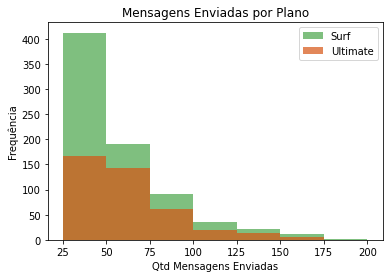

In [25]:
# Histograma de mensagens enviadas

surf_messages = user_total_data[user_total_data['plan'] == "surf"]['messages_send']
ultimate_messages = user_total_data[user_total_data['plan'] == "ultimate"]['messages_send']

plt.title('Mensagens Enviadas por Plano')
plt.xlabel('Qtd Mensagens Enviadas')
plt.ylabel('Frequência')
plt.hist(surf_messages, bins=[25, 50, 75, 100, 125, 150, 175, 200],
         label='Surf', color='#008000', alpha = 0.5)
plt.hist(ultimate_messages, bins=[25, 50, 75, 100, 125, 150, 175, 200],
         label='Ultimate',color='#D75413', alpha = 0.7)
plt.legend(loc='upper right')
plt.show()


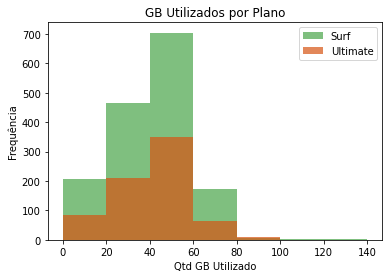

In [26]:
# histogramas de dados utilizados

surf_gb = user_total_data[user_total_data['plan'] == "surf"]['total_gb_used']
ultimate_gb = user_total_data[user_total_data['plan'] == "ultimate"]['total_gb_used']

plt.title('GB Utilizados por Plano')
plt.xlabel('Qtd GB Utilizado')
plt.ylabel('Frequência')
plt.hist(surf_gb, bins=[0, 20, 40, 60, 80, 100, 120, 140],
         label='Surf', color='#008000', alpha = 0.5)
plt.hist(ultimate_gb, bins=[0, 20, 40, 60, 80, 100, 120, 140],
         label='Ultimate',color='#D75413', alpha = 0.7)
plt.legend(loc='upper right')
plt.show()

#Conjunto de dados assimetrico                                                

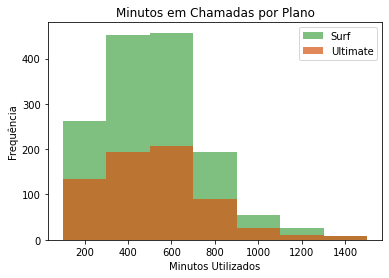

In [27]:
# histogramas de minutos de chamadas

surf_minutes = user_total_data[user_total_data['plan'] == "surf"]['minutes_used']
ultimate_minutes = user_total_data[user_total_data['plan'] == "ultimate"]['minutes_used']

plt.title('Minutos em Chamadas por Plano')
plt.xlabel('Minutos Utilizados')
plt.ylabel('Frequência')
plt.hist(surf_minutes, bins=[100, 300, 500, 700, 900, 1100, 1300, 1500],
         label='Surf', color='#008000', alpha = 0.5)
plt.hist(ultimate_minutes, bins=[100, 300, 500, 700, 900, 1100, 1300, 1500],
         label='Ultimate',color='#D75413', alpha = 0.7)
plt.legend(loc='upper right')
plt.show()


### CONCLUSÃO:

Foi possível identificar que por mais que o plano ultimate seja mais caro, a empresa telecomunicações Megaline ganha uma receita maior com o plano Surf, visto que a média de mensagem enviadas e de minutos em chamados ficam na maioria das vezes dentro dos limites dos planos, entretanto a grande maioria dos clientes estrapolam a quantidade de dados permitidos, sendo cobrado uma taxa a mais.

Abaixo será colocado a média e a mediana que os clientes dos dois planos gastam e os histogramas dos mesmos.

<AxesSubplot:>

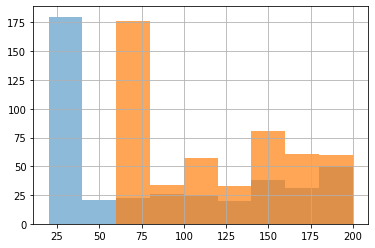

In [28]:
# histogramas que mostra receita de cada plano
user_total_data[user_total_data['plan'] == "surf"]['revenue'].hist(bins=[20, 40, 60, 80, 100, 120, 140, 160, 180, 200], alpha=0.5)
user_total_data[user_total_data['plan'] == "ultimate"]['revenue'].hist(bins=[20, 40, 60, 80, 100, 120, 140, 160, 180, 200], alpha=0.7)


In [29]:
user_total_data[user_total_data['plan'] == "ultimate"]['revenue'].mean()

166.09530386740332

In [30]:
user_total_data[user_total_data['plan'] == "ultimate"]['revenue'].median()

154.0

In [31]:
user_total_data[user_total_data['plan'] == "surf"]['revenue'].mean()

307.523894870171

In [32]:
user_total_data[user_total_data['plan'] == "surf"]['revenue'].median()

320.0

---

## Etapa . Testar hipóteses

Nessa etapa vamos testar as seguintes hipóteses:

    1º) A receita média dos usuários dos planos Ultimate e Surf são diferentes
    2º) A receita média dos usuários da área de NY-NJ é diferente dos usuários de outras regiões
    
   variavel estrateteficada entre surf e ultimate

In [33]:
# Testando a primeira hipótese

revenue_surf = user_total_data[user_total_data['plan'] == "surf"]['revenue'].values
revenue_ultimate = user_total_data[user_total_data['plan'] == "ultimate"]['revenue'].values

# nível crítico de significância estatística padrão
alpha = 0.05

results = st.ttest_ind(revenue_surf, revenue_ultimate, equal_var = False)

print('p-value:', results.pvalue)

if results.pvalue > alpha:
    print("Nós rejeitamos a hipótese nula")
else:
    print("Nós não podemos rejeitar a hipótese nula")

p-value: 9.016840194899725e-128
Nós não podemos rejeitar a hipótese nula


In [34]:
# Testando a segunda hipótese

revenue_nf_nj = user_total_data[user_total_data['city'].str.contains("NY-NJ")]['revenue']
revenue_others_city =  user_total_data[user_total_data['city'].str.contains("NY-NJ") == False]['revenue']

# nível crítico de significância estatística padrão
alpha = 0.05

results = st.ttest_ind(revenue_nf_nj, revenue_others_city, equal_var = False)

print('p-value:', results.pvalue)

if results.pvalue > alpha:
    print("Nós rejeitamos a hipótese nula")
else:
    print("Nós não podemos rejeitar a hipótese nula")

p-value: 0.0032590641893519416
Nós não podemos rejeitar a hipótese nula


### CONCLUSÃO

A partir do teste t realizado a cima conseguimos mostrar para a equipe de publicidade que o plano surf tem valores de rentabilidade diferentes do plano utilmate e pelos histogramas conseguimos notar que os valores são maiores. Também vimos que a teoria que os valores dos clientes da área de NY-NJ eram diferentes do restante das regiões era improvável de acontecer.


